In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import files
uploaded = files.upload()

Saving crop_production.csv to crop_production (3).csv


In [0]:
import io
crop_df = pd.read_csv(io.BytesIO(uploaded['crop_production.csv']))

In [0]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       246091 non-null object
District_Name    246091 non-null object
Crop_Year        246091 non-null int64
Season           246091 non-null object
Crop             246091 non-null object
Area             246091 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [0]:
crop_df.dropna(subset=['Production'],axis=0,inplace=True)

In [0]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
State_Name       242361 non-null object
District_Name    242361 non-null object
Crop_Year        242361 non-null int64
Season           242361 non-null object
Crop             242361 non-null object
Area             242361 non-null float64
Production       242361 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


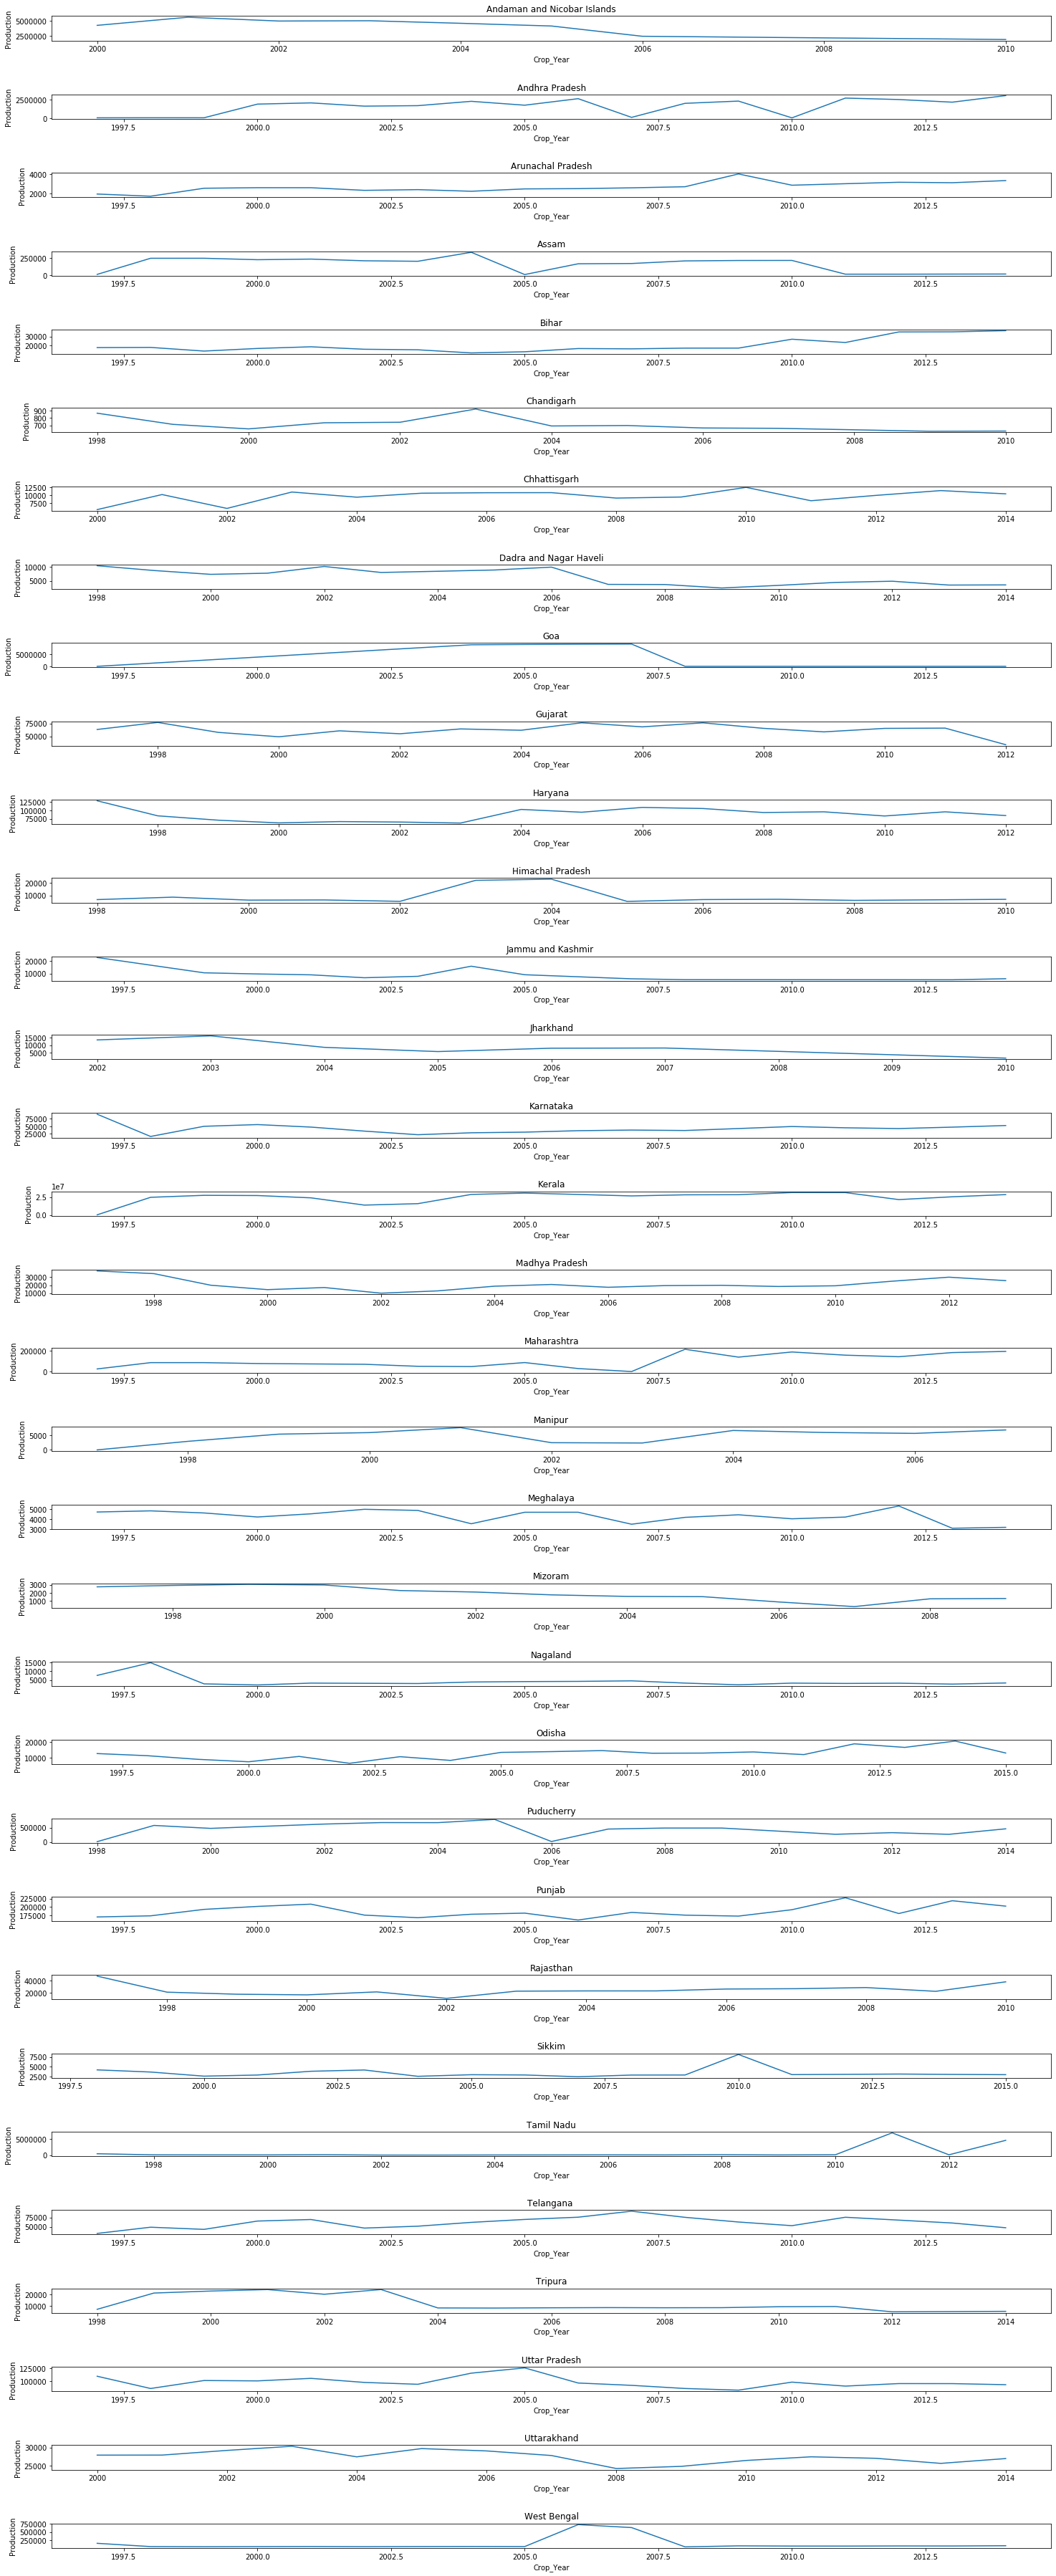

In [0]:
fig, ax = plt.subplots(figsize=(25,65), sharex='col')
count = 1

for state in crop_df.State_Name.unique():
    plt.subplot(len(crop_df.State_Name.unique()),1,count)
    sns.lineplot(crop_df[crop_df.State_Name==state]['Crop_Year'],crop_df[crop_df.State_Name==state]['Production'], ci=None)
    plt.subplots_adjust(hspace=2.2)
    plt.title(state)
    count+=1

Text(0.5, 1.0, 'Overall Crops vs Production')

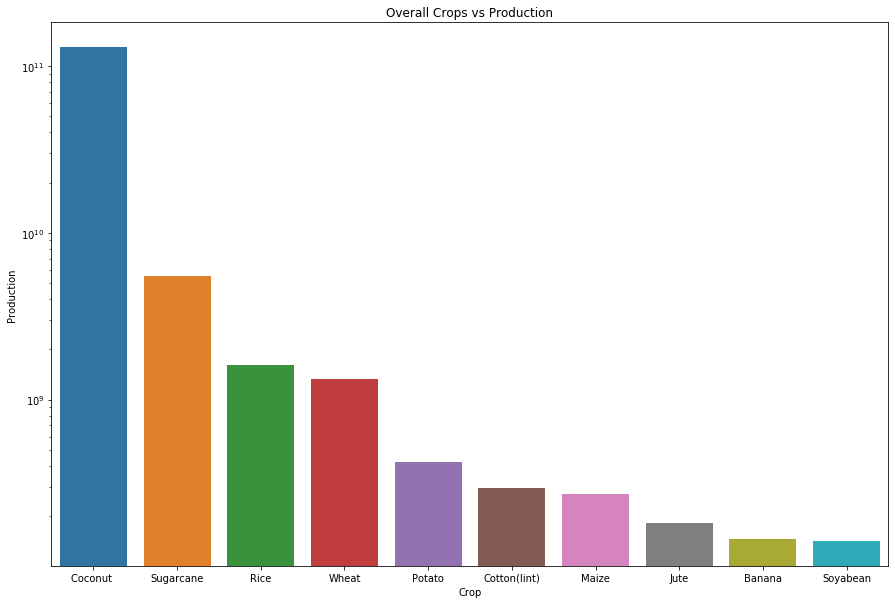

In [0]:
crop = crop_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production,errwidth=0)
plt.yscale('log')
plt.title('Overall Crops vs Production')

In [0]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [0]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

crop_df['Zones'] = crop_df.apply(get_zonal_names, axis=1)
crop_df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [0]:
zone_df = crop_df.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
zone_df.head()

,Zones,Production
4,South Zone,1.284797e+11
3,North Zone,4.365489e+09
6,West Zone,2.575008e+09
2,NE Zone,2.165305e+09
1,East Zone,1.936070e+09


Text(0.5, 1.0, 'Zone-Wise Production: Total')

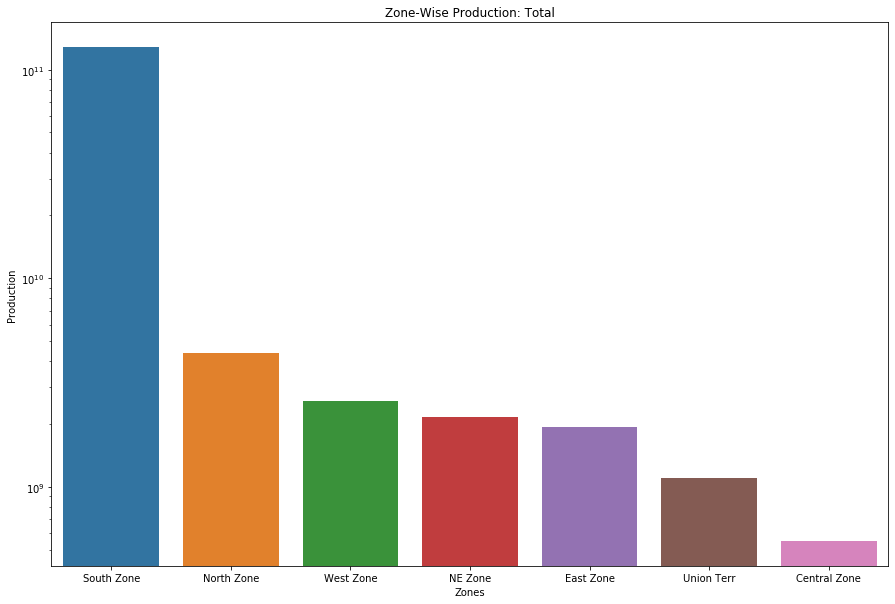

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(zone_df.Zones, zone_df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08


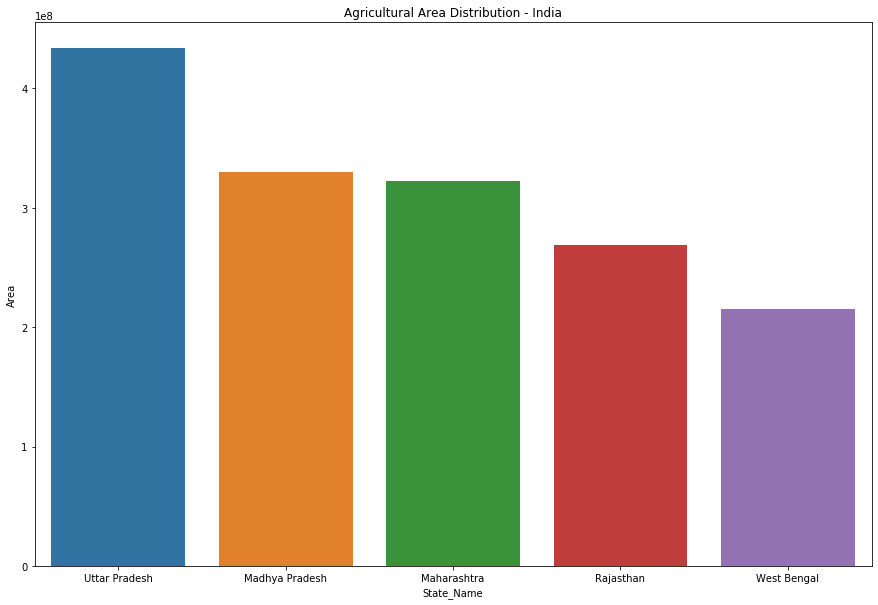

In [0]:
df = crop_df.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df.head()

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df.State_Name.head(5), df.Area.head(5), errwidth=0)
plt.title('Agricultural Area Distribution - India')
df.head(5)

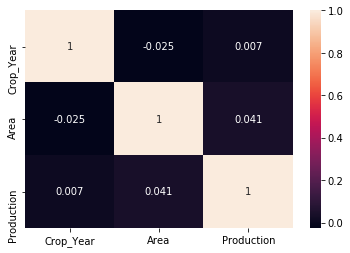

In [0]:
plt.tick_params(labelsize=10)
sns.heatmap(crop_df.corr(),annot=True)


In [0]:
top_crop_pro = crop_df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


In [0]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 171)
x_test : (79980, 171)
y_train : (162381, 1)
y_test : (79980, 1)


In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score value:",r)

R2score value: 0.703732093859691


In [0]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
preds = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.14641046241949818

In [0]:
data1 = crop_df.drop(["District_Name","Crop_Year"],axis=1)

data_dum = pd.get_dummies(data1)
data_dum[:10]

,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,...,Crop_Rajmash Kholar,Crop_Rapeseed &Mustard,Crop_Redish,Crop_Ribed Guard,Crop_Rice,Crop_Ricebean (nagadal),Crop_Rubber,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Zones_Central Zone,Zones_East Zone,Zones_NE Zone,Zones_North Zone,Zones_South Zone,Zones_Union Terr,Zones_West Zone
0,1254.0,2000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,102.0,321.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,176.0,641.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,720.0,165.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,18168.0,65100000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,36.0,100.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,5.0,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,40.0,169.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 171)
x_test : (79980, 171)
y_train : (162381, 1)
y_test : (79980, 1)


In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.7042717600634578


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
preds = model.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

0.14641046241949818